завдання (1)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context('talk')
dataset = pd.read_csv('./titanic.csv')
dataset.describe()
print("Розмір:", dataset.shape)
dataset.dtypes

Розмір: (891, 12)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

завдання (2)

Age         177
Cabin       687
Embarked      2
dtype: int64


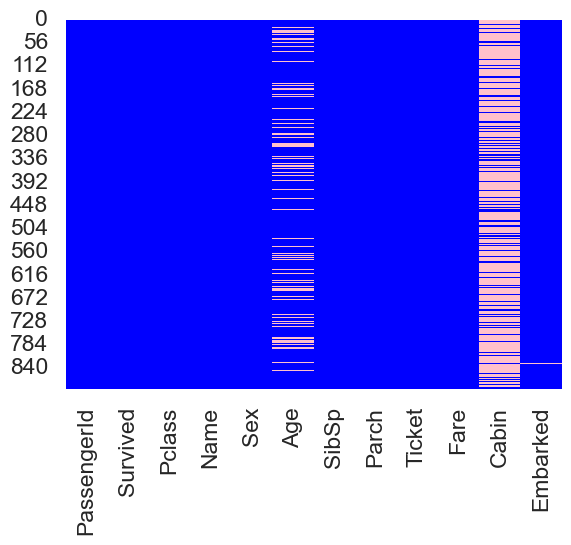

In [10]:
missing_values = dataset.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)
sns.heatmap(dataset.isnull(), cbar=False, cmap=['blue', 'pink'])
plt.show()



1) З аналізу атрибуту Cabin видно, що майже всі значення пропущені. Отже, доцільно видалити цей атрибут, оскільки він не має практичної інформаційної цінності.
2) Пропущені значення в атрибуті Age можна заповнити середнім значенням, оскільки кількість пропусків невелика, і це не суттєво вплине на аналіз.
3) Атрибут Embarked має лише 2 пропущені значення, що є невеликою кількістю. Можливо, ці дані можна відновити або видалити відповідні записи без великого впливу на загальний аналіз.

завдання (3)

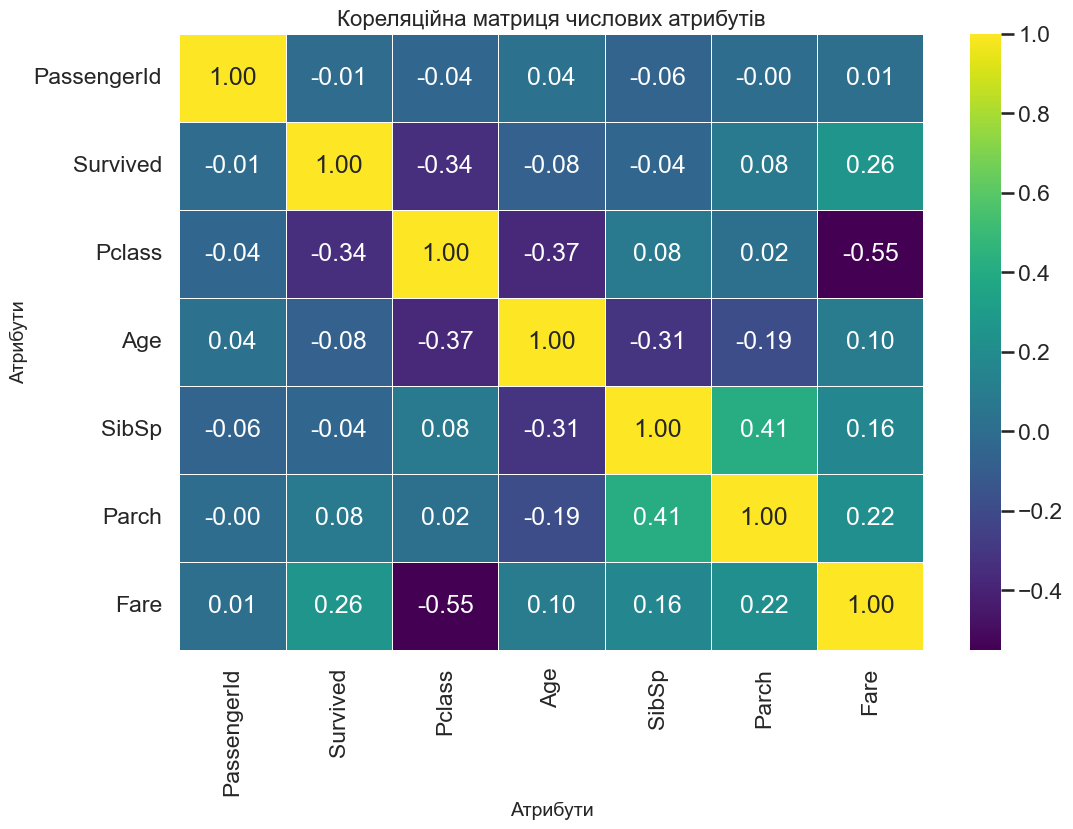

In [20]:

numeric_columns = dataset.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Кореляційна матриця числових атрибутів', fontsize=16)
plt.xlabel('Атрибути', fontsize=14)
plt.ylabel('Атрибути', fontsize=14)
plt.show()



1) Survived/Pclass, Pclass/Age, Age/SibSp Коефіцієнти кореляції для цих пар змінних практично відсутні або невеликі, що свідчить про слабкий або відсутній лінійний зв'язок між ними.

2) Fare/Pclass та Pclass/Fare Великі за абсолютним значенням коефіцієнти кореляції між Fare та Pclass (-0.55 та -0.55 відповідно) вказують на сильний зв'язок між цими атрибутами. Це може означати, що пасажири з вищим класом мали значно вищі вартості квитків, або навпаки. Залежно від контексту ці зв'язки можуть вказувати на економічний статус або вартість проїзду на кораблі.


завдання (4)

In [25]:
def fill_missing_values_by_group(df, column_name, group_columns):
    df_copy = df.copy()
    df_copy[column_name] = df_copy.groupby(group_columns)[column_name].transform(lambda x: x.fillna(x.mean()))
    return df_copy
columns_to_fill = ["Age"] 
group_columns = ["Pclass", "Sex"] 
filled_dataset = fill_missing_values_by_group(dataset, columns_to_fill[0], group_columns)
missing_values_after_fill = filled_dataset.isnull().sum()
print("Кількість пропущених значень після заповнення:")
print(missing_values_after_fill)


Кількість пропущених значень після заповнення:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


 1) В результаті використання функції для заповнення пропущених значень середніми за групами у вказаних колонках "Age", кількість пропущених значень для цих колонок стала нульовою. Це свідчить про те, що пропущені дані були ефективно заповнені враховуючи групування за атрибутами "Pclass" і "Sex".1

завдання (5)

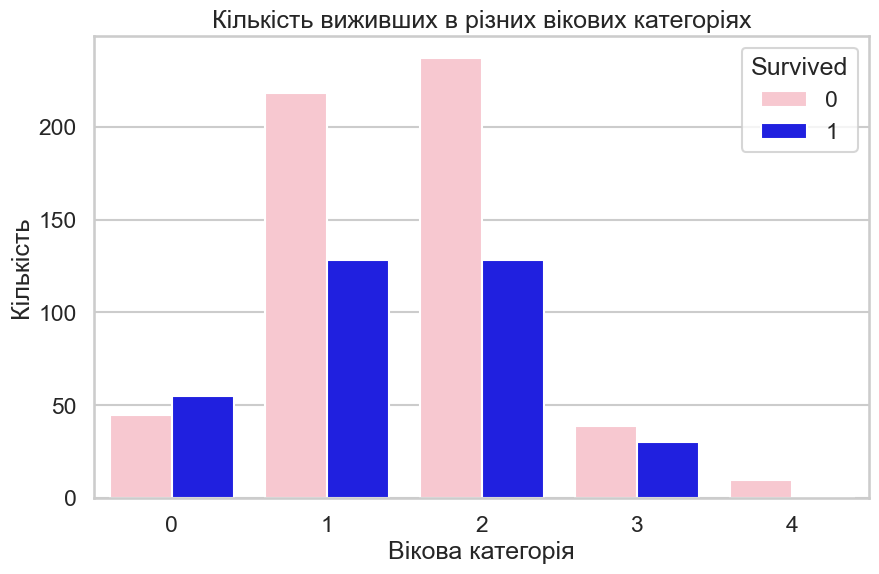

In [28]:
bins = [0, 16, 32, 48, 64, 80]
labels = [0, 1, 2, 3, 4]
dataset['Age_bin'] = pd.cut(dataset['Age'], bins=bins, labels=labels, include_lowest=True)
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_bin', hue='Survived', data=dataset, palette=['pink', 'blue'])
plt.title('Кількість виживших в різних вікових категоріях')
plt.xlabel('Вікова категорія')
plt.ylabel('Кількість')
plt.show()


Найбільше людей в 1 та 2 групі, в 4 віковій групі нема живих.(Ще є щось в 3 але не багато)

завдання (6)

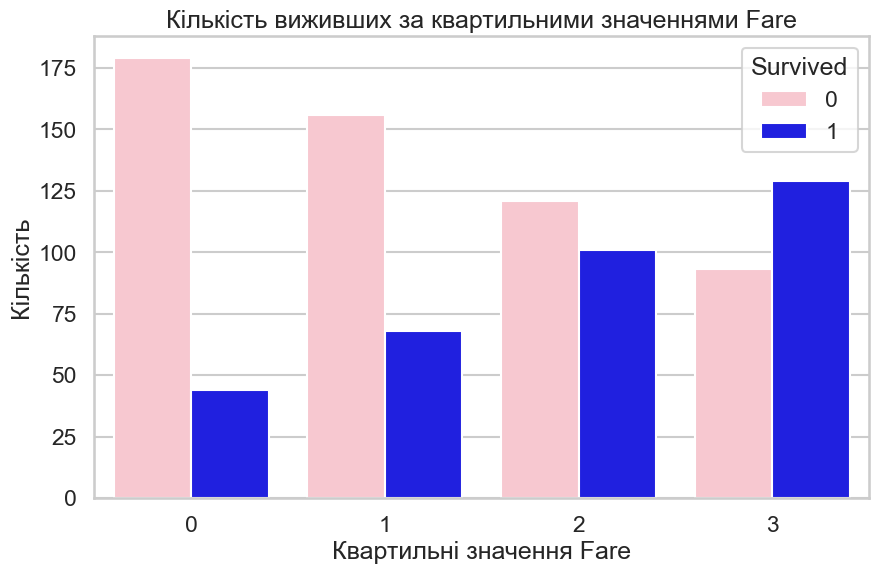

In [31]:
dataset['Fare_bin'] = pd.qcut(dataset['Fare'], q=4, labels=False)
plt.figure(figsize=(10, 6))
sns.countplot(x='Fare_bin', hue='Survived', data=dataset, palette=['pink', 'blue'])
plt.title('Кількість виживших за квартильними значеннями Fare')
plt.xlabel('Квартильні значення Fare')
plt.ylabel('Кількість')
plt.show()


Кількість виживших в залежності від квартильних значень Fare показує, що пасажири з вищими квартильними значеннями мають більше шансів вижити.

завжання (7)

In [36]:
dataset['Family_size'] = dataset['Parch'] + dataset['SibSp'] + 1
dataset['Alone'] = np.where(dataset['Family_size'] == 1, 1, 0)
family_size_stat = pd.crosstab(dataset['Survived'], dataset['Family_size'])
print(family_size_stat)


Family_size   1   2   3   4   5   6   7   8   11
Survived                                        
0            374  72  43   8  12  19   8   6   7
1            163  89  59  21   3   3   4   0   0


1) Сім'ї, в яких було від 2 до 4 людей, мали більше шансів на виживання.
2) Люди, які подорожували великими сім'ями 8 або 9 люжей, в основному не вижили.

завдання (8)

In [16]:
dataset = pd.read_csv('./titanic.csv')
dataset.drop('Cabin', axis=1, inplace=True)
print(dataset)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

1) Видалення стовпця 'Cabin' обгрунтовано великою кількістю пропущених значень понад 80%, що робить його менш інформативним для аналізу. Це спрощує датасет і полегшує подальший аналіз, зберігаючи при цьому необхідну інформацію.

завдання (9)

In [20]:
dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})
dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
print(dataset.head())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3  NaN  22.0      1      0         A/5 21171   
1            2         1       1  NaN  38.0      1      0          PC 17599   
2            3         1       3  NaN  26.0      0      0  STON/O2. 3101282   
3            4         1       1  NaN  35.0      1      0            113803   
4            5         0       3  NaN  35.0      0      0            373450   

      Fare  Embarked  ...  Title_Master  Title_Miss  Title_Mlle  Title_Mme  \
0   7.2500       NaN  ...         False       False       False      False   
1  71.2833       NaN  ...         False       False       False      False   
2   7.9250       NaN  ...         False        True       False      False   
3  53.1000       NaN  ...         False       False       False      False   
4   8.0500       NaN  ...         False       False       False      False   

   Title_Mr  Title_Mrs  Title_Ms  Title_Rev  Title_Sir  

1) Кодування змінних у числові значення спрощує подальшу аналітику та моделювання даних.

ззавдання (10)

C:\Users\Вася\AppData\Local\Temp\ipykernel_32468\1015238692.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=dataset, palette=['blue', 'pink'])
C:\Users\Вася\AppData\Local\Temp\ipykernel_32468\1015238692.py:5: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=var, data=dataset, palette=['blue', 'pink'])


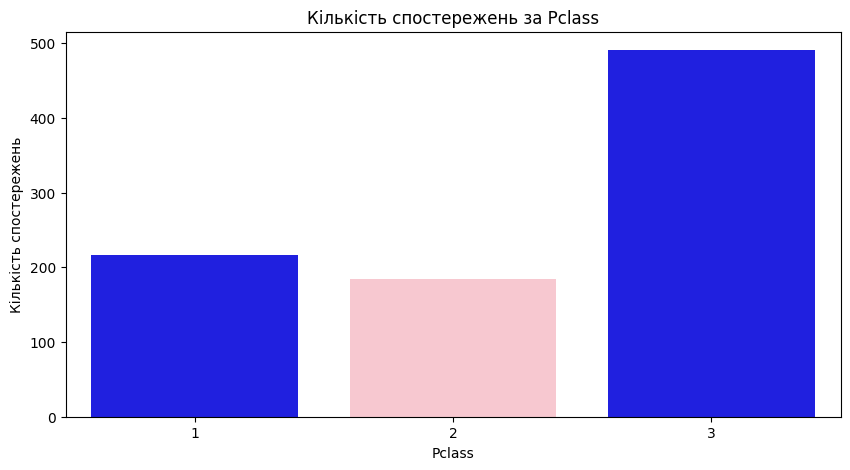

C:\Users\Вася\AppData\Local\Temp\ipykernel_32468\1015238692.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=dataset, palette=['blue', 'pink'])


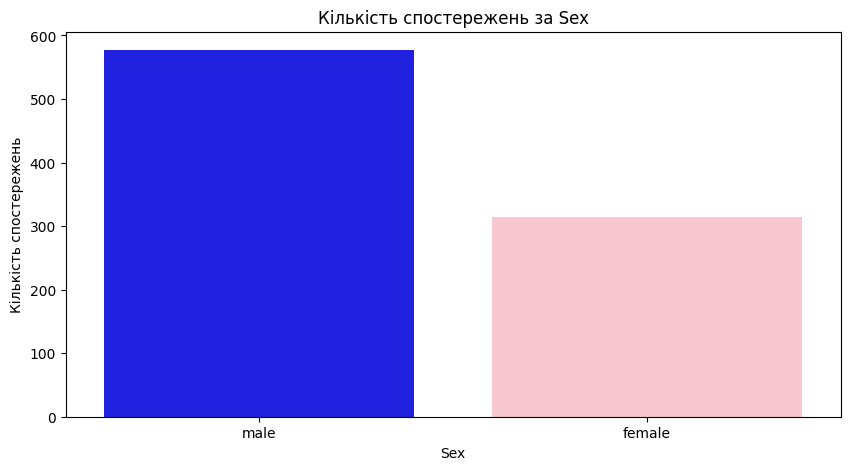

C:\Users\Вася\AppData\Local\Temp\ipykernel_32468\1015238692.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=dataset, palette=['blue', 'pink'])
C:\Users\Вася\AppData\Local\Temp\ipykernel_32468\1015238692.py:5: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=var, data=dataset, palette=['blue', 'pink'])


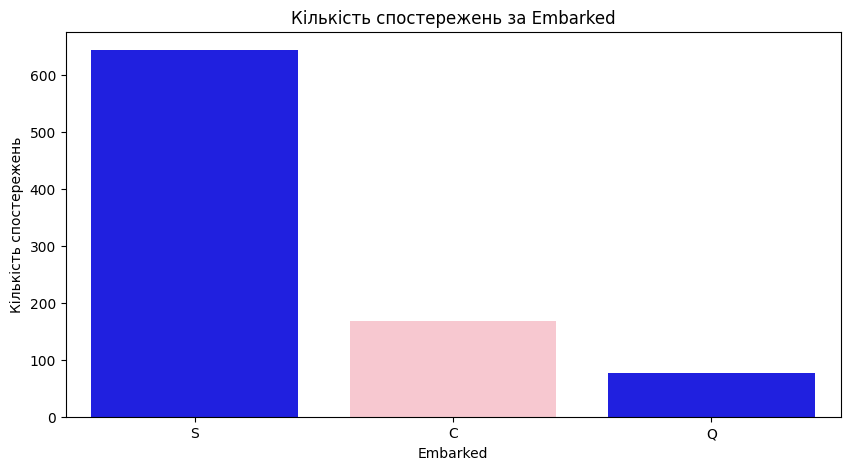

In [8]:
cat_vars = ['Pclass', 'Sex', 'Embarked']
for var in cat_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=var, data=dataset, palette=['blue', 'pink'])
    plt.title(f'Кількість спостережень за {var}')
    plt.xlabel(var)
    plt.ylabel('Кількість спостережень')
    plt.show()


Побудовано сітку графіків, яка відображає кількість спостережень для кожної категорії змінної. Більшість пасажирів посадилися в порту Southampton (S), меншість - в порту Cherbourg (C) та Queenstown (Q).

завдання (11)

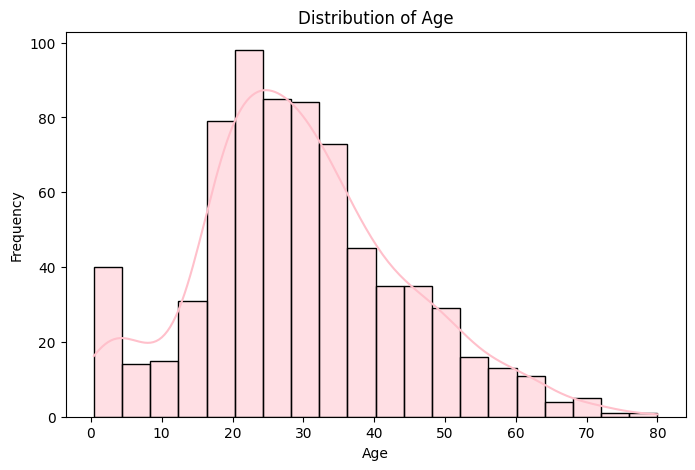

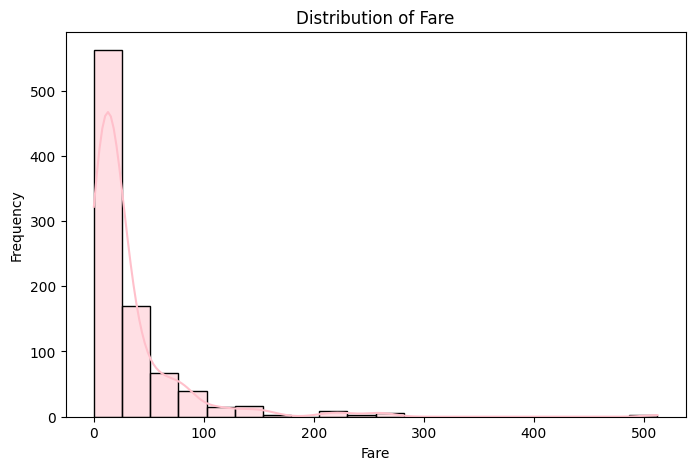

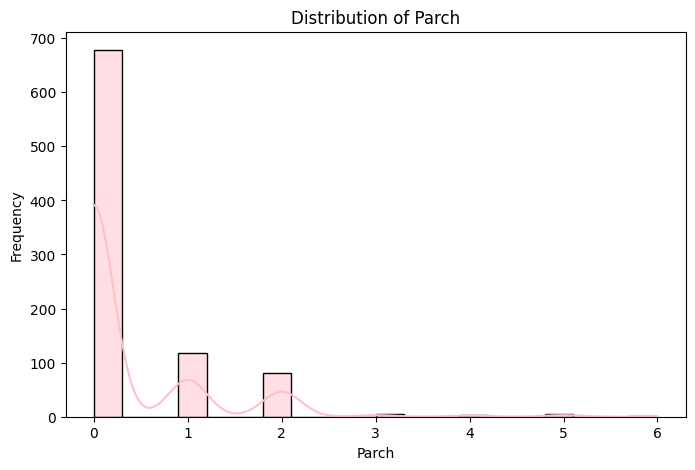

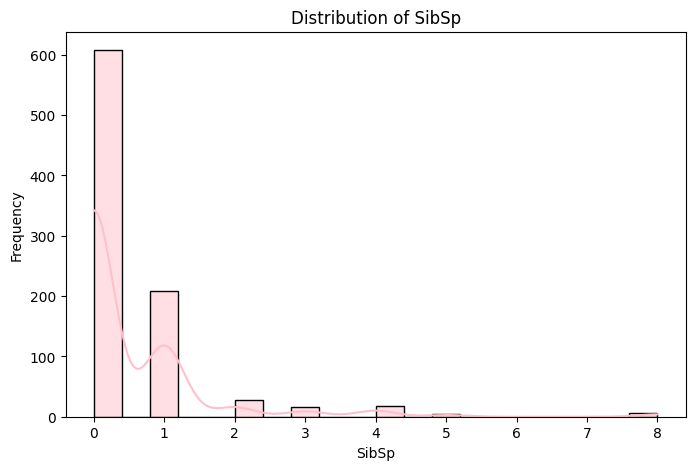

In [10]:
num_vars = ['Age', 'Fare', 'Parch', 'SibSp']
for var in num_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(dataset[var], bins=20, kde=True, color='pink')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


1) Більше всього молодих пасажирів у віці 20-30 років, а також кілька дітей і літніх осіб.
2) Більшість квитків були дешевими, але є декілька викидів.
3) Більшість пасажирів подорожували без родичів або сім'ї, але деякі мали кілька родичів на борту.

завдання (12)

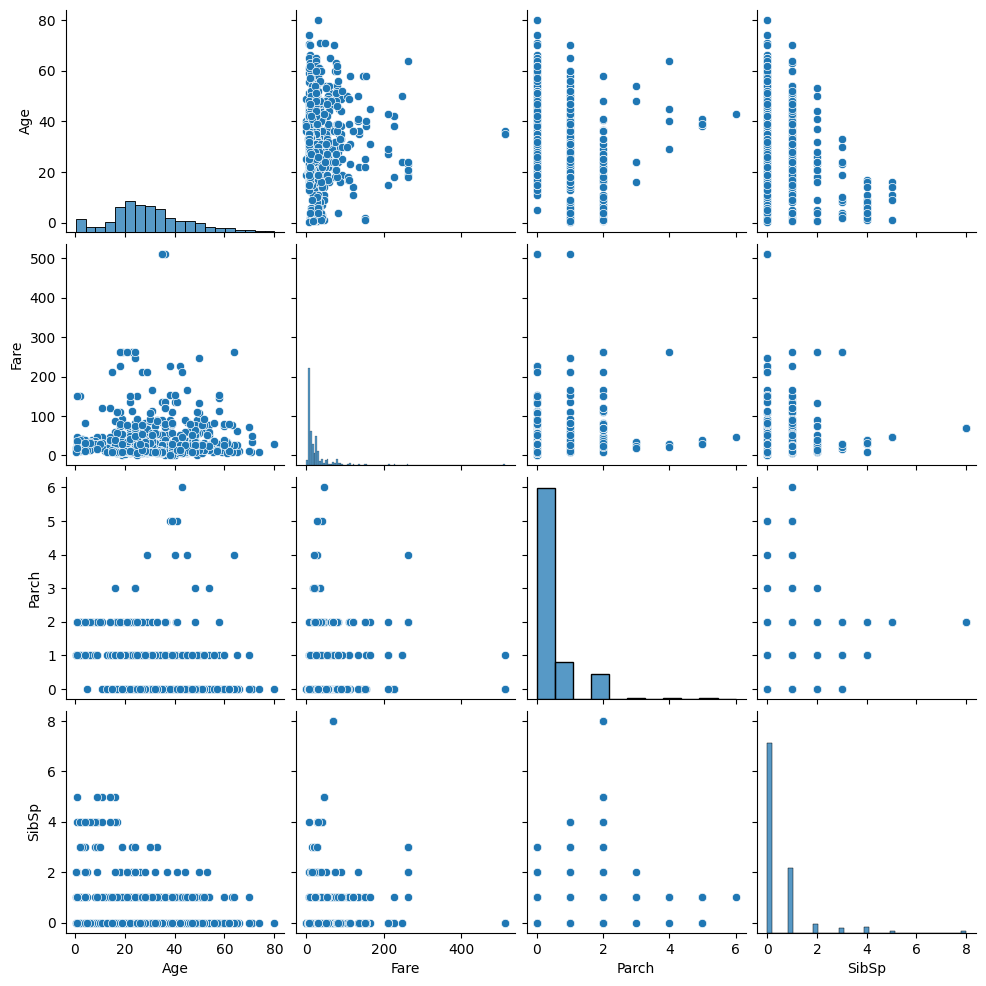

In [16]:
sns.pairplot(dataset[num_vars])
plt.show()

Побудовані графіки показують взаємозв'язки між числовими змінними. Аналізуючи їх, можна помітити розподіл кожної змінної, виявити залежності між ними та виявити можливі викиди або аномалії.